## Normal Distribution - QQ Plot
- For this we need 2 data
    - Theoratical Data -> follows Normal Distribution
    - Actual Data -> whose distribution you want to check
- Sort both the data and calculate percentile and plot scatter plot of these percentile values

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

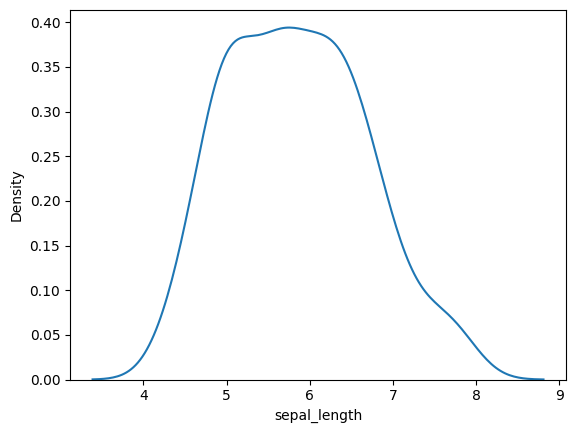

In [3]:
# Ploting KDE for sepal_length
sns.kdeplot(df['sepal_length'])

In [6]:
y = df['sepal_length'].sort_values().to_list()

In [7]:
y_quant = []

for i in range(1,101):
  y_quant.append(np.percentile(y,i))

In [8]:
# Creating Theoritical Normal Data
samples = np.random.normal(loc=0,scale=1,size=1000)
x_quant = []

for i in range(1,101):
  x_quant.append(np.percentile(samples,i))

<Axes: >

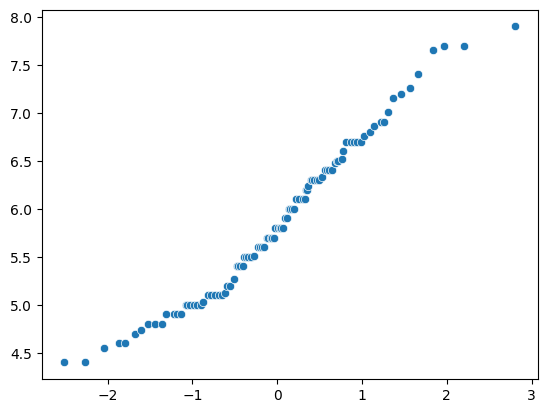

In [9]:
sns.scatterplot(x=x_quant,y=y_quant)

### Alternative Method

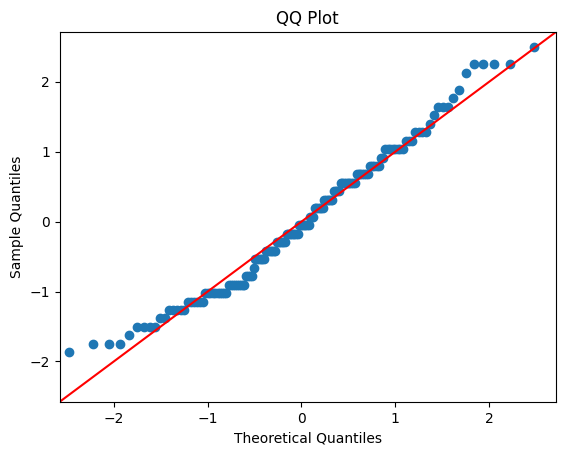

In [10]:
# using statsmodel

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


## Uniform Distribution using QQ Plot

In [11]:
data = np.random.uniform(low = 0, high = 1, size = 1000)

(array([ 89., 101., 117.,  90., 110., 108.,  94.,  97.,  99.,  95.]),
 array([2.43115766e-04, 1.00147633e-01, 2.00052151e-01, 2.99956669e-01,
        3.99861186e-01, 4.99765704e-01, 5.99670221e-01, 6.99574739e-01,
        7.99479257e-01, 8.99383774e-01, 9.99288292e-01]),
 <BarContainer object of 10 artists>)

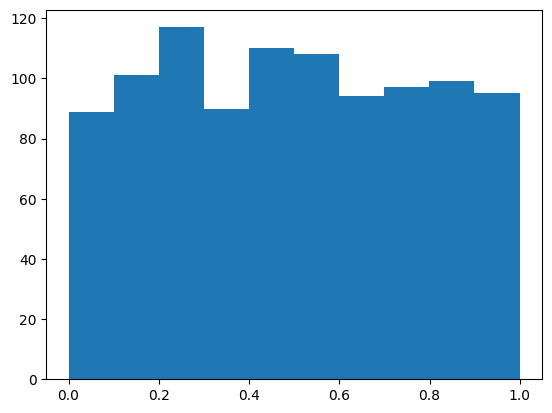

In [12]:
plt.hist(data)

In [16]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(data)
dist = stats.uniform(loc=params[0], scale=params[1])

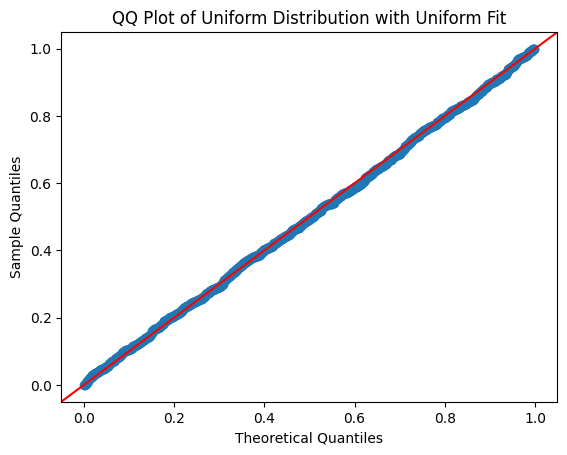

In [18]:
# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(data, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

## Pareto Distribution - QQ Plot & Log-Log Plot

In [19]:
x = np.linspace(0.1, 10, 1000)

xm = 1
alpha = 0.1

In [20]:

# Creating a y values from PDF equation
y = (alpha * (xm ** alpha)) / (x ** (alpha + 1))

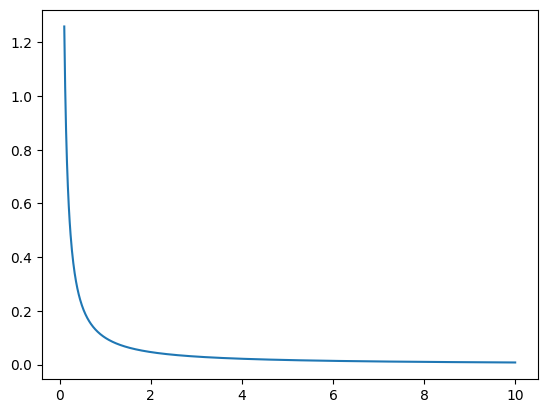

In [21]:

plt.plot(x, y)

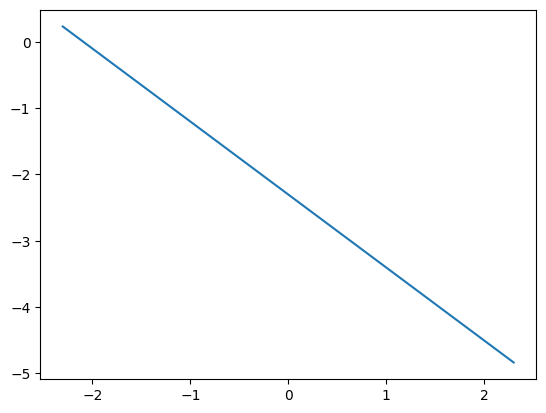

In [22]:
# Verifying Pareto Distribution using log log Plot
plt.plot(np.log(x),np.log(y))

In [23]:
# As like uniform destribution - we have to create a theoritical values of pareto destribution
alpha = 2
xm = 1
x = stats.pareto.rvs(b = alpha, scale = xm, size = 1000)

In [24]:


params = stats.pareto.fit(x, floc = 0)
print(params)
'''
param[0] -> xm
param[1] -> location
param[2] -> scale
'''
dist = stats.pareto(b = params[0], scale= params[2])

(np.float64(1.9311941382199327), 0, np.float64(1.001068498577019))


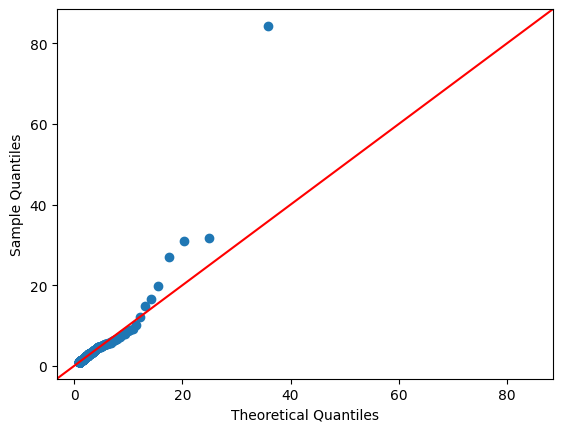

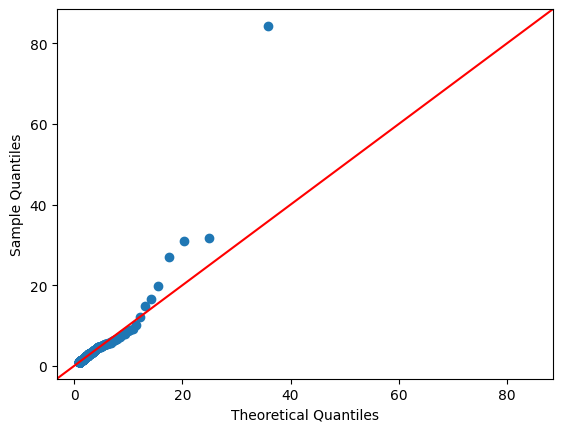

In [25]:
sm.qqplot(x, dist = dist, line= '45')